### Import Modules

In [ ]:
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.sentiment = dataset.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
dataset.shape
dataset.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

### Processing Data

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('',text)

def preprocesses_text(sen):

  sentence = remove_tags(sen)
  sentence = re.sub(r'[^\w\s]','',sen, re.UNICODE)

  sentence = re.sub('^a-zA-Z', ' ', sentence)

  sentence = re.sub(r"\s+[a-zA-Z]\s", ' ', sentence)

  sentence = re. sub(r'\s+', ' ',sentence)

  return sentence



In [ ]:
X = []
sentences = list(dataset['review'])
for s in sentences:
  X.append(preprocesses_text(s))

In [ ]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows 

### Train - Test Split

In [ ]:
y = dataset['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [ ]:
tokenizer = Tokenizer(num_words=5000, lower= False)
tokenizer.fit_on_texts(X_train)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
maxlen =200

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = pad_sequences(X_train, maxlen=maxlen, truncating='post', padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, truncating='post', padding='post')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 200) (40000,)
(10000, 200) (10000,)


### Model Fit - CNN

In [ ]:
from keras.layers import Input
model_CNN = Sequential()
model_CNN. add (Embedding(input_dim = vocab_size, output_dim = 50, input_length = maxlen, trainable=False))
model_CNN. add (Conv1D(filters=128, kernel_size= 5,padding ='same', activation= 'relu'))
model_CNN. add (Dense(24, activation= 'relu'))
model_CNN. add (GlobalMaxPool1D())
model_CNN. add (Dropout(0.3))
model_CNN. add (Dense(1, activation= 'sigmoid'))


# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (MaxPooling1D(pool_size = 2))
# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (Dense(1, activation= 'sigmoid'))

model_CNN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           8745450   
                                                                 
 conv1d (Conv1D)             (None, 200, 128)          32128     
                                                                 
 dense (Dense)               (None, 200, 24)           3096      
                                                                 
 global_max_pooling1d (Globa  (None, 24)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                        

In [ ]:
history = model_CNN.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1, validation_split= 0.2)
score =model_CNN.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
8000/8000 [==============================] - 38s 3ms/step - loss: 0.6137 - accuracy: 0.6495 - val_loss: 0.5420 - val_accuracy: 0.7261
Epoch 2/20
8000/8000 [==============================] - 26s 3ms/step - loss: 0.5420 - accuracy: 0.7208 - val_loss: 0.5108 - val_accuracy: 0.7435
Epoch 3/20
8000/8000 [==============================] - 24s 3ms/step - loss: 0.5096 - accuracy: 0.7437 - val_loss: 0.4932 - val_accuracy: 0.7501
Epoch 4/20
8000/8000 [==============================] - 26s 3ms/step - loss: 0.4834 - accuracy: 0.7625 - val_loss: 0.4797 - val_accuracy: 0.7670
Epoch 5/20
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4551 - accuracy: 0.7854 - val_loss: 0.4701 - val_accuracy: 0.7657
Epoch 6/20
8000/8000 [==============================] - 24s 3ms/step - loss: 0.4266 - accuracy: 0.7997 - val_loss: 0.4737 - val_accuracy: 0.7722
Epoch 7/20
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4036 - accuracy: 0.8162 - val_loss: 0.4802 - val_ac

### Data Validation

In [ ]:
print("Test Score: ",score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.7116695046424866
Test Accuracy:  0.7633000016212463


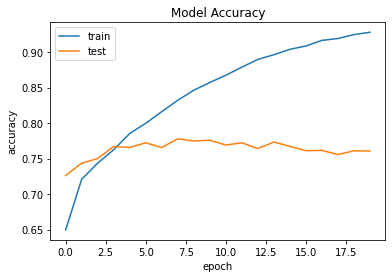

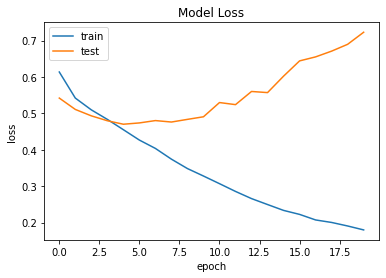

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

### Other Scores

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[3024 1937]
 [3031 2008]]


0.5032

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('CNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3024 1937]
 [3031 2008]]
precision:0.509 
recall:0.398
F1 score: 0.447
AUC: 0.5040
Accuracy: 50.32%


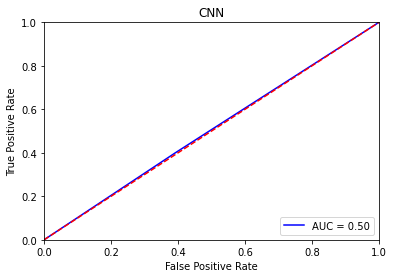

In [ ]:
evaluate(y_test, y_pred)